In [1]:
import pandas as pd
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler


'\ndef confusion_matrix(results, labels):\n    data = {\'y_Actual\':results[:,0].astype(np.uint8), \'y_Predicted\':labels}\n    df = pd.DataFrame(data, columns=[\'y_Actual\', \'y_Predicted\'])\n    cm = pd.crosstab(df[\'y_Actual\'], df[\'y_Predicted\'],\n    rownames=[\'Actual\'], colnames=[\'Predicted\'])\n    cm = cm.astype(np.float32) / cm.sum(axis=1)[:,np.newaxis]*100.0\n    sn.heatmap(cm, annot=True, fmt=\'.2f\', annot_kws={"size":8})\n    plt.title(\'Normalized Confusion Matrix in %\')\n    plt.show()\n'

In [2]:
def replace_string_with_int(x):
    if x == 'rest':
        return 0
    elif x == 'transport':
        return 1
    elif x == 'flying':
        return 2

TRAIN_TEST_SPLIT = 0.8

header = ["accx", "accy", "accz", "gyrx", "gyry", "gyrz", "no"]

def split_dataframe(df, chunk_size = 30): 
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks

In [3]:
df_test = pd.DataFrame(columns=header)
df_train = pd.DataFrame(columns=header)

df = pd.read_csv("../data/flying_all.csv", names=header, skiprows=1000, nrows=30000)
df = df.drop(columns=['no'])
df["label"] = 'flying'
# Split into training and test-set
dfs = np.split(df, [int(len(df)*TRAIN_TEST_SPLIT)], axis=0)


#dfs[0].to_csv("train_flying1.csv")  
#dfs[1].to_csv("test_flying1.csv")
df_train = pd.concat([dfs[0], df_train],axis=0)
df_test = pd.concat([dfs[1], df_test],axis=0)
df = pd.read_csv("../data/measure_transport.csv", names=header, skiprows=1000, nrows=30000)
df = df.drop(columns=["no"])
df["label"] = 'transport'
# Split into training and test-set
dfs = np.split(df, [int(len(df)*TRAIN_TEST_SPLIT)], axis=0)


#dfs[0].to_csv("train_flying1.csv") 
#dfs[1].to_csv("test_flying1.csv")
df_train = pd.concat([dfs[0], df_train],axis=0)
df_test = pd.concat([dfs[1], df_test],axis=0)

df = pd.read_csv("../data/rest_horizontal.csv", names=header, skiprows=1000, nrows=10000)
df = df.drop(columns=["no"])
df["label"] = 'rest'
# Split into training and test-set
dfs = np.split(df, [int(len(df)*TRAIN_TEST_SPLIT)], axis=0)

#dfs[0].to_csv("train_flying1.csv") 
#dfs[1].to_csv("test_flying1.csv")
df_train = pd.concat([dfs[0], df_train],axis=0)
df_test = pd.concat([dfs[1], df_test],axis=0)

df = pd.read_csv("../data/rest_vertical_left.csv", names=header, skiprows=1000, nrows=10000)
df = df.drop(columns=["no"])
df["label"] = 'rest'
# Split into training and test-set
dfs = np.split(df, [int(len(df)*TRAIN_TEST_SPLIT)], axis=0)

#dfs[0].to_csv("train_flying1.csv") 
#dfs[1].to_csv("test_flying1.csv")
df_train = pd.concat([dfs[0], df_train],axis=0)
df_test = pd.concat([dfs[1], df_test],axis=0)

df = pd.read_csv("../data/rest_vertical_right.csv", names=header, skiprows=1000, nrows=10000)
df = df.drop(columns=["no"])
df["label"] = 'rest'
# Split into training and test-set
dfs = np.split(df, [int(len(df)*TRAIN_TEST_SPLIT)], axis=0)

#dfs[0].to_csv("train_flying1.csv")  
#dfs[1].to_csv("test_flying1.csv")
df_train = pd.concat([dfs[0], df_train],axis=0)
df_test = pd.concat([dfs[1], df_test],axis=0)

[[0.47485599 0.51413963 0.57845248 0.58531949 0.46201072 0.4067999 ]
 [0.47653285 0.51624838 0.57818503 0.58484976 0.46198749 0.40712805]
 [0.47611392 0.51681041 0.58032572 0.58500633 0.46256813 0.40608393]
 ...
 [0.77903641 0.43411593 0.41879959 0.52423683 0.46613588 0.43061977]
 [0.77833762 0.4414263  0.41572173 0.58312906 0.48441441 0.39822216]
 [0.77121183 0.45421989 0.41746125 0.60403199 0.51351604 0.38834776]]
[[0.47331935 0.517092   0.57738213 0.58549563 0.46247523 0.40718772]
 [0.47681214 0.51765402 0.57818503 0.58506505 0.46249845 0.40694906]
 [0.47583407 0.51681041 0.57925537 0.58526077 0.46249845 0.40706839]
 ...
 [0.49190501 0.27328365 0.43886979 0.61397458 0.47208163 0.41847813]
 [0.48911044 0.29184146 0.44703137 0.62470006 0.47503128 0.41731468]
 [0.49330201 0.32473901 0.46482715 0.62462177 0.46290753 0.42522017]]
Accuracy: 0.9787222222222223 
True Class: [0 0 0 ... 2 2 2] 
predicted Class: [0 0 0 ... 2 2 2]


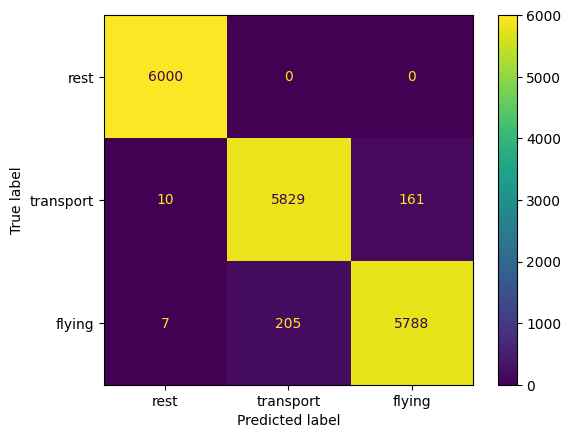

In [4]:

k = 10

x_train = df_train.iloc[:, 0:-2].to_numpy()
y_train = df_train.iloc[:, -2:-1].to_numpy()

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train);
print(x_train)


clf = neighbors.KNeighborsClassifier(n_neighbors = k)
clf.fit(x_train.astype(float), y_train.ravel())


x_test = df_test.iloc[:,:-2].to_numpy()
y_test = df_test.iloc[:,-2:-1].to_numpy()

x_test = scaler.transform(x_test);
print(x_test)

y_predict = clf.predict(x_test.astype(float))





y_test = y_test.ravel().tolist()
y_predict = y_predict.tolist()
y_test = list(map(replace_string_with_int ,y_test))
y_predict = list(map(replace_string_with_int ,y_predict))

accuracy = np.mean(np.array(y_test) == np.array(y_predict))
print("Accuracy:", np.array(accuracy), "\nTrue Class:", np.array(y_test[:]), "\npredicted Class:", np.array(y_predict[:]))

cm = confusion_matrix(y_test, y_predict)
labels = ['rest', 'transport', 'flying']
cm = confusion_matrix(y_test, y_predict)
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()
plt.show()